In [1]:
from kan import create_dataset, KAN
import openai
import LLMSR
from LLMSR.kansr import KANSR
import torch
import os
import matplotlib.pyplot as plt

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
LLMSR.llm.check_key_limit(client)

2025-03-17 09:33:20,932 - LLMSR.llm - INFO - API key check successful. Remaining limit: 138.01436695


138.01436695

# Try library

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = KAN(width=[1,4,1], grid=7, k=3, seed=10, device=device, symbolic_enabled=False)
kan_sr = KANSR(model=model, client=client)

# create dataset
f = lambda x: (x**3 + torch.pi)**2
ranges = [-2, 2]
dataset = kan_sr.create_dataset(f, n_var=1, ranges=ranges, train_num=10000, test_num=1000)

checkpoint directory created: ./model
saving model version 0.0


2025-03-17 09:33:31,262 - LLMSR.kansr - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 2.09e-02 | test_loss: 2.00e-02 | reg: 2.90e+01 | : 100%|█| 50/50 [00:14<00:00,  3.57it


saving model version 0.1
Unpruned model. Pruning? True


2025-03-17 09:33:45,824 - LLMSR.kansr - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-03-17 09:33:45,832 - LLMSR.kansr - INFO - Pruned model:


saving model version 0.2


2025-03-17 09:33:46,058 - LLMSR.kansr - INFO - Final train loss: 0.020871156826615334


0.020871156826615334

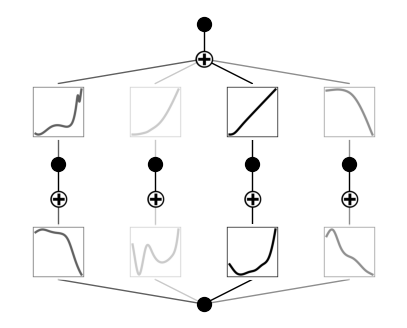

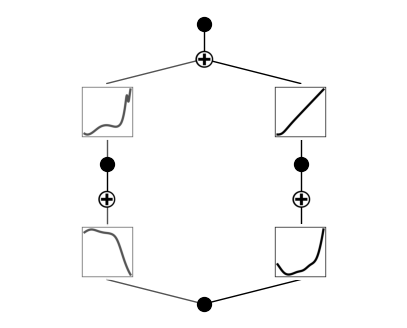

In [4]:
# # train KAN
kan_sr.train_kan(dataset,prune=True, steps=50)


2025-03-17 09:34:00,453 - LLMSR.llm - INFO - API key usage check successful. Current usage: 61.98563305
2025-03-17 09:34:00,455 - LLMSR.kansr - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-03-17 09:34:00,457 - LLMSR.kansr - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-03-17 09:34:00,532 - LLMSR.llm - INFO - API key usage check successful. Current usage: 61.98563305
2025-03-17 09:34:00,533 - LLMSR.llmSR - INFO - Processing KAN model connections
2025-03-17 09:34:00,534 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,0)


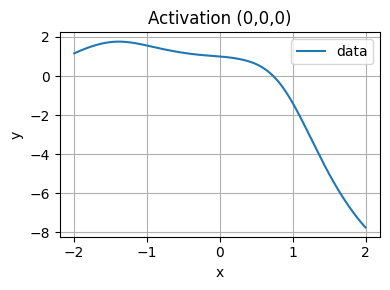

2025-03-17 09:34:00,628 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,0)
2025-03-17 09:34:01,108 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -22.832334518432617, for constant: [-0.40566937]
2025-03-17 09:34:01,109 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-17 09:34:04,304 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-17 09:34:04,305 - LLMSR.llmSR - INFO - Initial population best: score=-0.8044868111610413, params=[ 24.93007766   0.05088537  -2.05356586 -23.77069671], ansatz: params[0] * np.exp(-params[1] * x**2) + params[2] * x + params[3]...


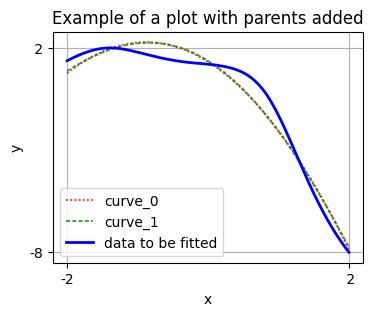

2025-03-17 09:34:04,375 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:07,665 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.8044885396957397, params=[-1.54542762e+03  1.32879613e-03  2.49301922e+01  5.08851171e-02
 -2.37708115e+01], ansatz: params[0] * np.sin(params[1] * x) + params[2] * np.exp(-params[3] * x**2) + params[4]...
2025-03-17 09:34:07,666 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:12,450 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.03868085518479347, params=[ 44.09851972   0.64636621 -43.83964021   0.65249307   1.18413485
   1.15004374], ansatz: params[0] * np.tanh(params[1] * x) + params[2] * np.sin(params[3] * x) - params[4] * x**2 + params[5...
2025-03-17 09:34:12,450 - LLMSR.llmSR - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:14,043 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found i


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 1
  Success rate: 97.56%

Breakdown by processing stage:
  Api Call: 41 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 1 failed (97.56% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 1
Approximation for (0,0,0): params[0] * np.tanh(params[1] * x) + params[2] * np.sin(params[3] * x) - params[4] * x**2 + params[5] * np.exp(-params[6] * x**2), with score -0.03820732980966568 and parameters [ 43.538   0.648 -43.37    0.653   1.057   1.162   0.137]


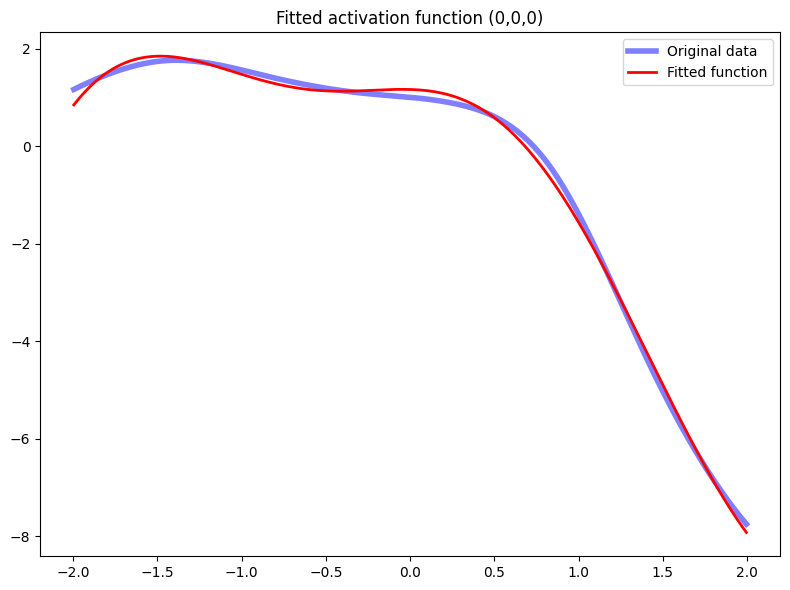

2025-03-17 09:34:18,263 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (0,0,1)


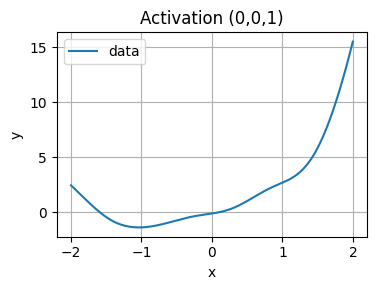

2025-03-17 09:34:18,323 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (0,0,1)
2025-03-17 09:34:18,324 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -5.821011543273926, for constant: [1.76242744]
2025-03-17 09:34:18,324 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-17 09:34:21,071 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-17 09:34:21,072 - LLMSR.llmSR - INFO - Initial population best: score=-0.26681452989578247, params=[-0.77455059  1.47563846  1.91859118  0.35591295], ansatz: params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3...


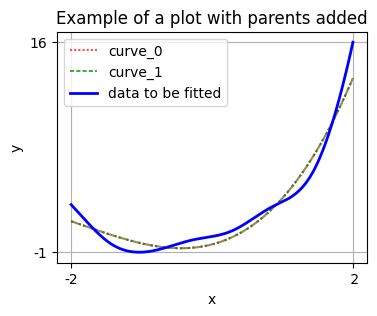

2025-03-17 09:34:21,141 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:22,848 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm unable to provide the name of a person in an image or make guesses or assumptions about their identity or characteristics.'
2025-03-17 09:34:27,901 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.07109972089529037, params=[ 1.42515913e-03  4.32656923e+00  1.33303152e+00  1.73805655e+00
 -4.37890959e-01], ansatz: params[0] * np.exp(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-17 09:34:27,901 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:29,006 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't assist with that.'
2025-03-17 09:34:31,661 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.009611940011382103, params=[ 2.77409965  1.38690


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 2
  Success rate: 95.24%

Breakdown by processing stage:
  Api Call: 42 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 2 failed (95.24% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - no parameters: 1
    - llm refusal: 1
Approximation for (0,0,1): params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5], with score -0.009611940011382103 and parameters [ 2.774  1.387 -1.483 -2.544 -1.815 -2.775]


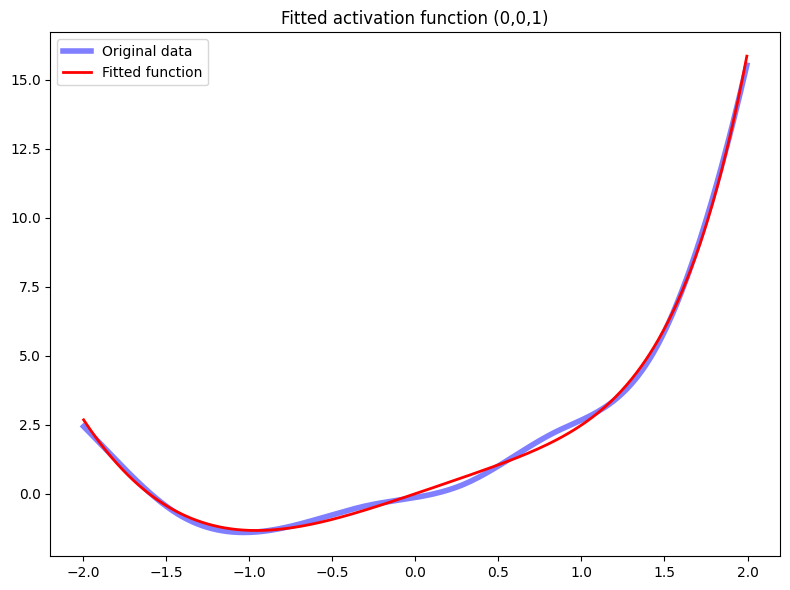

2025-03-17 09:34:34,587 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,0,0)


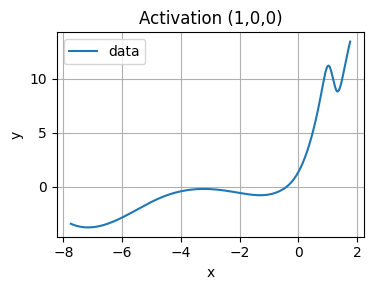

2025-03-17 09:34:34,652 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,0,0)
2025-03-17 09:34:34,653 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -4.687592029571533, for constant: [6.51886408]
2025-03-17 09:34:34,653 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-17 09:34:35,728 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I can't help with that.'
2025-03-17 09:34:38,215 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-17 09:34:38,216 - LLMSR.llmSR - INFO - Initial population best: score=-0.25111842155456543, params=[1.85941014 1.33825994 0.00986575 3.53452307 0.67054937], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**3 + params[3] * np.exp(params[4] * x)...


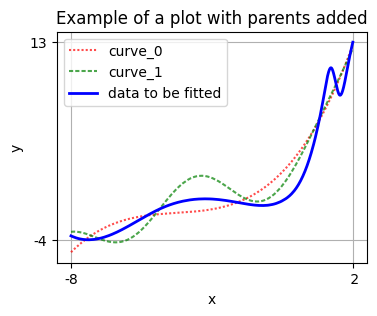

2025-03-17 09:34:38,285 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:44,662 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.2276715338230133, params=[2.51986975 1.11692908 0.27927907 2.72770772 4.00851605], ansatz: params[0] * np.sin(params[1] * x) + params[2] * x**2 + params[3] * x + params[4]...
2025-03-17 09:34:44,663 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:50,594 - LLMSR.llmSR - INFO - Generation 2 best: score=-0.20384958386421204, params=[ 1.69363367 -1.40047724 -3.29904285  0.07514461  0.85390916  3.22827804
  3.0792698 ], ansatz: params[0] * np.sin(params[1] * x + params[2]) + params[3] * x**3 + params[4] * x**2 + params[5] * x ...
2025-03-17 09:34:50,595 - LLMSR.llmSR - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:34:52,035 - LLMSR.llmSR - WARNING - Ansatz extraction failed: No parameters found in ansatz: 'I'm sorry, I c


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 3
  Success rate: 93.02%

Breakdown by processing stage:
  Api Call: 43 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 40 succeeded, 3 failed (93.02% success)
  Function Conversion: 40 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 0 failed (100.00% success)

Error types:
  Extraction Errors:
    - llm refusal: 3

Validation issues:
  - nan values: 1

Fitting warnings:
  - covariance estimation: 1
  - invalid log: 7
Approximation for (1,0,0): params[0] * np.sin(params[1] * x + params[2]) + params[3] * x**3 + params[4] * x**2 + params[5] * x + params[6], with score -0.20384958386421204 and parameters [ 1.694 -1.4   -3.299  0.075  0.854  3.228  3.079]


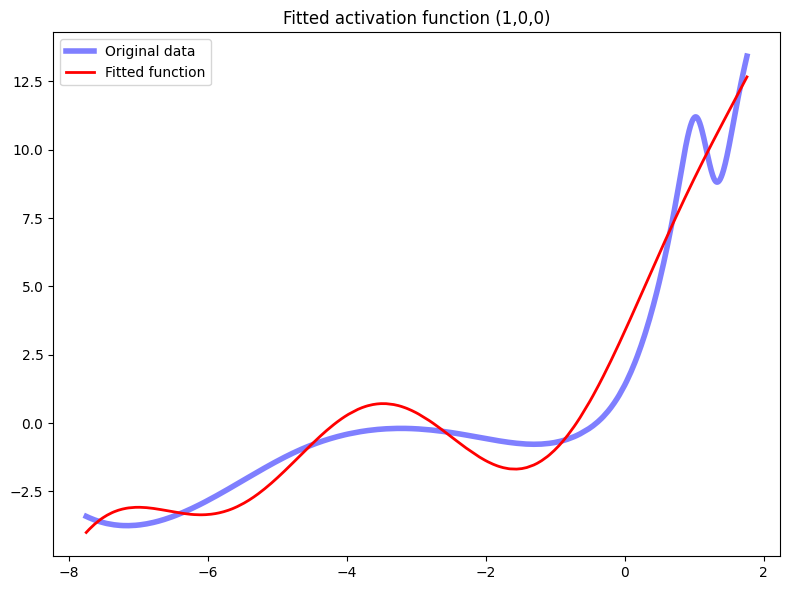

2025-03-17 09:34:56,599 - LLMSR.llmSR - INFO - Processing non-symbolic activation function (1,1,0)


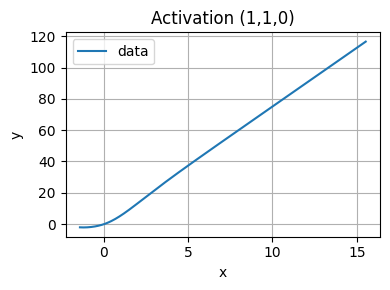

2025-03-17 09:34:56,663 - LLMSR.llmSR - INFO - Running genetic algorithm for connection (1,1,0)
2025-03-17 09:34:56,665 - LLMSR.llmSR - INFO - Constant function is not a good fit: Score: -31.911779403686523, for constant: [14.43238765]
2025-03-17 09:34:56,665 - LLMSR.llmSR - INFO - Generating initial population asynchronously
2025-03-17 09:35:00,047 - LLMSR.llmSR - INFO - Generated 10 individuals
2025-03-17 09:35:00,048 - LLMSR.llmSR - INFO - Found 6 non-finite scores, setting all to -0.5279273986816406. Example ansatz: params[0] * np.log(x + params[1]) + params[2] * x
2025-03-17 09:35:00,049 - LLMSR.llmSR - INFO - Initial population best: score=-0.2639636993408203, params=[0.11577322 5.94158967 2.12377706], ansatz: params[0] * x**2 + params[1] * x + params[2]...


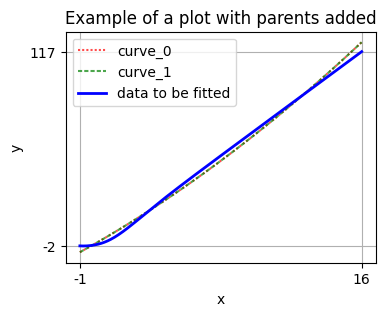

2025-03-17 09:35:00,117 - LLMSR.llmSR - INFO - Generation 1/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:35:03,094 - LLMSR.llmSR - INFO - Generation 1 best: score=-0.09063108265399933, params=[ 7.82507662  1.67492562  4.74286592 -1.19904292], ansatz: params[0] * x + params[1] + params[2] * np.tanh(params[3] * x)...
2025-03-17 09:35:03,095 - LLMSR.llmSR - INFO - Generation 2/3: Generating 10 new individuals. Elitism? False
2025-03-17 09:35:07,184 - LLMSR.llmSR - INFO - Generation 2 best: score=nan, params=[1. 1. 1. 1.], ansatz: params[0] * np.log(params[1] + x) + params[2] * x + params[3]...
2025-03-17 09:35:07,186 - LLMSR.llmSR - INFO - Generation 3/3: Generating 10 new individuals. Elitism? False
<string>:1: RuntimeWarning: invalid value encountered in log1p
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log1p
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning:


API Call Statistics:
  Successful calls (end-to-end): 40
  Failed calls: 1
  Success rate: 97.56%

Breakdown by processing stage:
  Api Call: 41 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 41 succeeded, 0 failed (100.00% success)
  Function Conversion: 41 succeeded, 0 failed (100.00% success)
  Curve Fitting: 40 succeeded, 1 failed (97.56% success)

Error types:
  Fitting Errors:
    - numerical error: 1

Validation issues:
  - nan values: 30

Fitting warnings:
  - invalid sqrt: 38
  - covariance estimation: 30
  - other warnings: 1
  - invalid log: 134
  - invalid power: 3202
Approximation for (1,1,0): params[0] * np.exp(params[1] * x) + params[2] * x + params[3], with score -0.016287880018353462 and parameters [ 2.523 -1.099  7.756 -2.458]


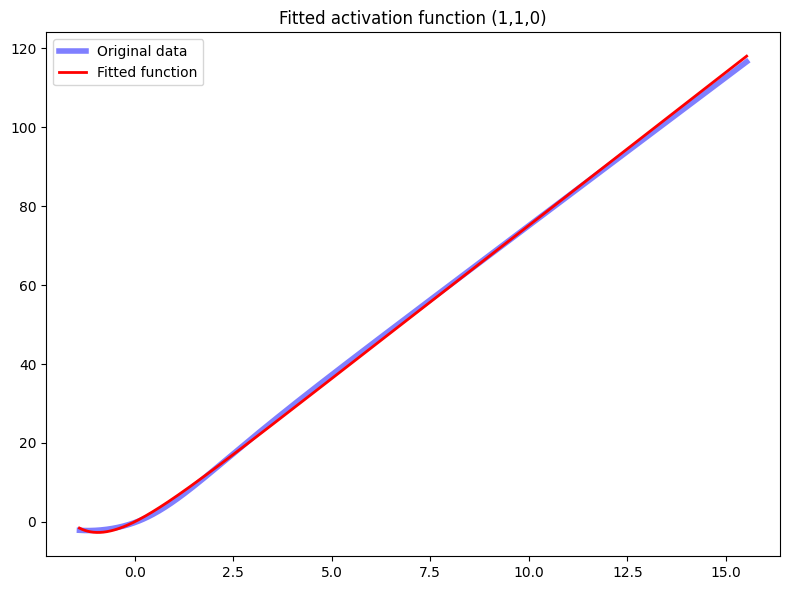

2025-03-17 09:35:15,312 - LLMSR.llmSR - INFO - KAN conversion complete: 4 total connections
2025-03-17 09:35:15,312 - LLMSR.llmSR - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-03-17 09:35:15,406 - LLMSR.llm - INFO - API key usage check successful. Current usage: 61.98563305
2025-03-17 09:35:15,406 - LLMSR.llmSR - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-03-17 09:35:15,407 - LLMSR.kansr - INFO - Approximation for (0, 0, 0): params[0] * np.tanh(params[1] * x) + params[2] * np.sin(params[3] * x) - params[4] * x**2 + params[5] * np.exp(-params[6] * x**2), has parameters [ 43.5   0.6 -43.4   0.7   1.1   1.2   0.1]
2025-03-17 09:35:15,408 - LLMSR.kansr - INFO - Approximation for (0, 0, 1): params[0] * np.exp(params[1] * x) + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5], has parameters [ 2.8  1.4 -1.5 -2.5 -1.8 -2.8]
2025-03-17 09:35:15,408 - LLMSR.kansr - INFO - Approximation for (1, 0, 0): params[0] * np.sin(params[1] 

KeyboardInterrupt: 

In [5]:
# fit KAN
best_expressions, best_chi_squareds, results_all_dicts = kan_sr.get_symbolic(population=10, generations=4, plot_parents=True, demonstrate_parent_plotting=True)

In [ ]:
print(kan_sr.results_all_dicts[0])

{'raw_expression': '-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009', 'raw_n_chi_squared': Array(2.4061227, dtype=float32), 'final_KAN_expression': '1.0*x0**6 + 6.2832*x0**3 + 9.8696', 'n_chi_squared_KAN_final': Array(7.7674735e-11, dtype=float32), 'final_LLM_expression': 'x0**6 + 6.2832*x0**3 + 9.8696', 'n_chi_squared_LLM_final': 48.76724624633789, 'best_expression': '-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009', 'best_n_chi_squared': Array(

2025-03-12 18:52:51,474 - LLMSR.kansr - INFO - Using internal dataset for plotting
2025-03-12 18:52:51,475 - LLMSR.kansr - INFO - Using provided ranges: [-2, 2]
2025-03-12 18:52:51,475 - LLMSR.kansr - INFO - Using self.f function for ground truth
2025-03-12 18:52:51,485 - LLMSR.kansr - INFO - Plotting raw expression
2025-03-12 18:52:51,486 - LLMSR.kansr - WARNING - Error plotting simplified expression: Too many indices: 0-dimensional array indexed with 1 regular index.


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'KAN Symbolic Regression Results'}, xlabel='x', ylabel='y'>)

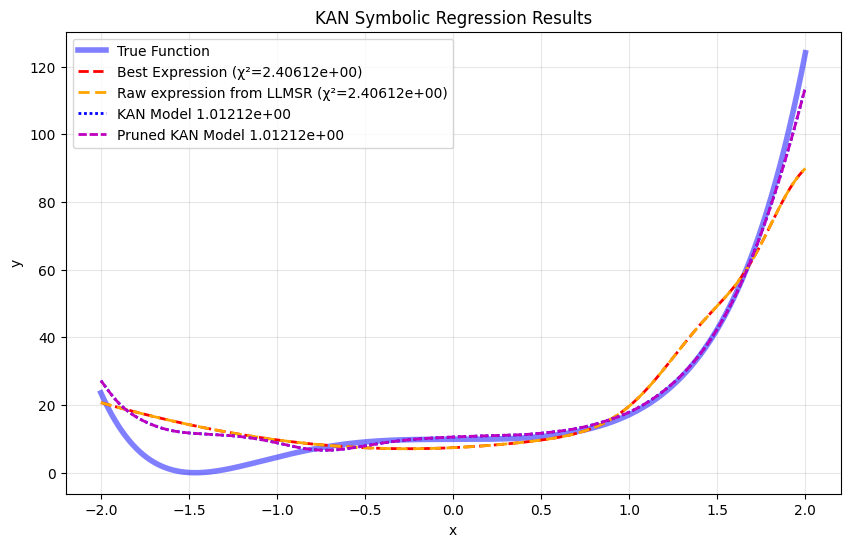

In [7]:
kan_sr.plot_results(ranges, kan_sr.results_all_dicts[0],title="KAN Symbolic Regression Results")

In [8]:
best_expressions, best_chi_squareds, results_all_dicts

(['-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009'],
 [Array(2.4061227, dtype=float32)],
 [{'raw_expression': '-0.002972321910964*x0**9 - 0.0299431404804*x0**8 - 0.130662120097026*x0**7 - 0.172360667935118*x0**6 + 0.575491363498297*x0**5 + 2.50564397106104*x0**4 + 3.73462989189019*x0**3 + 6.77568225436405*x0**2 + 2.39271390567917*x0 - 1.8191*np.sin(0.48025838*x0**3 + 1.612706*x0**2 + 1.62186289*x0 - 1.57430173) + 5.58711084925009',
   'raw_n_chi_squared': Array(2.4061227, dtype=float32),
   'final_KAN_expression': '1.0*x0**6 + 6.2832*x0**3 + 9.8696',
   'n_chi_squared_KAN_final': Array(7.7674735e-11, dtype=float32),
   'final_LLM_expression': 'x0**6 + 6.2832*x0**3 + 9.8696',
   'n_chi_squared_LLM_final': 48.7672462

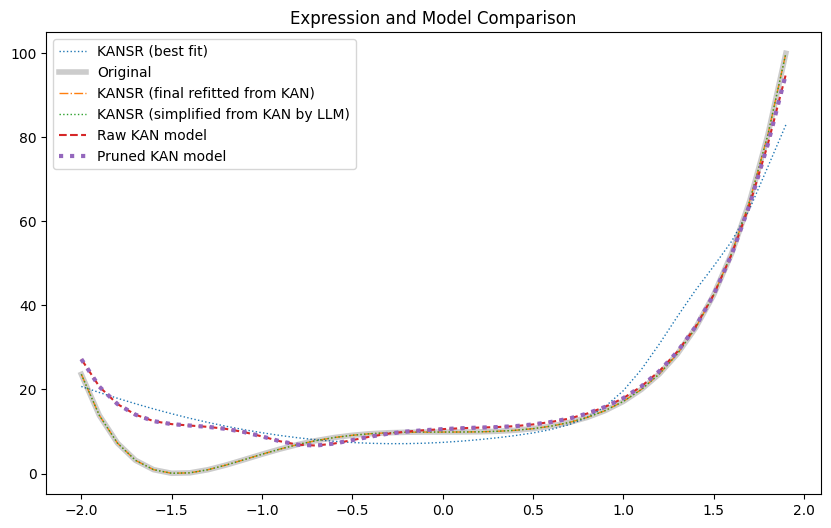

In [ ]:
import numpy as np
f_orig = lambda x0: (x0**3 + torch.pi)**2
f_kan_fitted= lambda x0: eval(results_all_dicts[0]['final_KAN_expression'])
f_llm_fitted = lambda x0: eval(results_all_dicts[0]['final_LLM_expression'])
f_best_fitted = lambda x0: eval(best_expressions[0])
xs = np.arange(ranges[0], ranges[1], .1)

# Convert to tensor for model evaluation
xs_tensor = torch.tensor(xs, dtype=torch.float32).unsqueeze(1).to(device)

# Evaluate the KAN models
raw_kan_outputs = kan_sr.raw_model(xs_tensor).cpu().detach().numpy().flatten()
pruned_kan_outputs = kan_sr.model(xs_tensor).cpu().detach().numpy().flatten()

# Plot all expressions and models
plt.figure(figsize=(10, 6))
plt.plot(xs, [f_best_fitted(x) for x in xs], linestyle=':', label="KANSR (best fit)", linewidth=1)  
plt.plot(xs, [f_orig(x) for x in xs], linestyle='-', c='black', label="Original", linewidth=4, alpha=0.2)
plt.plot(xs, [f_kan_fitted(x) for x in xs], linestyle='-.', label="KANSR (final refitted from KAN)", linewidth=1)
plt.plot(xs, [f_llm_fitted(x) for x in xs], linestyle=':', label="KANSR (simplified from KAN by LLM)", linewidth=1)
plt.plot(xs, raw_kan_outputs, linestyle='--', label="Raw KAN model", linewidth=1.5)
plt.plot(xs, pruned_kan_outputs, linestyle=':', label="Pruned KAN model", linewidth=3)
plt.legend()
plt.title("Expression and Model Comparison")
plt.show()


# Try $e^{1.83169-3.35509/x}$

/var/folders/n5/4xlf9f2j41z1r42htkz4vw0m0000gn/T/ipykernel_6753/626955180.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  f = lambda x: np.exp(1.83169-3.35509/x)


cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.90e-06 | test_loss: 5.76e-06 | reg: 9.11e+00 | : 100%|█| 50/50 [00:25<00:00,  1.93it


saving model version 0.1


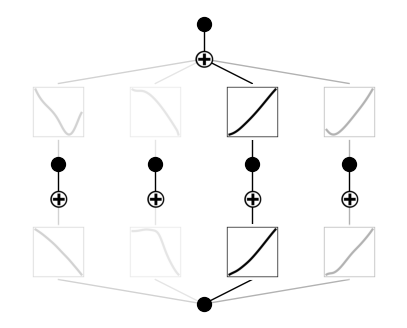

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# initialize KAN with G=3
model = KAN(width=[1,4,1], grid=7, k=3, seed=17, device=device, symbolic_enabled=False)

# create dataset
f = lambda x: np.exp(1.83169-3.35509/x)
ranges = [0.1, 2.]
dataset = create_dataset(f, n_var=1, ranges=ranges, train_num=10000, test_num=1000, device=device)
res_kan_training = model.fit(dataset, opt="LBFGS", steps=50);
model.plot()